<a href="https://colab.research.google.com/github/Rakshit-Sawarn-iitb/SOC/blob/main/SOC_WEEK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
rg = np.random.default_rng()

In [ ]:
bias = 0.5
lr = 0.001
epochs = 100
epoch_loss = []

# **Functions**

In [ ]:
def generate_data(n_features, n_values):
  features = rg.random((n_features, n_values))
  weights = rg.random((1,n_values))[0]
  targets = np.random.choice([0,1], n_features)
  data = pd.DataFrame(features, columns=["x0", "x1", "x2"])
  data["targets"] = targets
  return data, weights

In [ ]:
def get_weighted_sum(feature, weights, bias):
  return np.dot(feature, weights)+bias

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def cross_entropy(target, prediction):
  return -target*np.log(prediction)-(1-target)*np.log(1-prediction)

In [ ]:
def update_weights(weights, target, prediction, feature, lr=0.1):
  new_weights = []
  for x,w in zip(feature, weights):
    new_weights.append(w+(lr*(target-prediction)*x))
  return new_weights

In [ ]:
def update_bias(bias, target, prediction, lr=0.1):
  return bias+(lr*(target-prediction))

In [ ]:
def train_model(data, weights, bias, lr = 0.1, epochs = 10):
  for j in range(epochs):
    individual_loss = []
    for i in range(len(data)):
      feature = data.loc[i][:-1]
      target = data.loc[i][-1]
      wsum = get_weighted_sum(feature, weights, bias)
      prediction = sigmoid(wsum)
      loss = cross_entropy(target, prediction)
      individual_loss.append(loss)

      #Gradient Decent
      weights = update_weights(weights, target, prediction, feature, lr)
      bias = update_bias(bias, target, prediction, lr)
    average_loss = sum(individual_loss)/len(individual_loss)
    epoch_loss.append(average_loss)
    print(f"Epoch {j+1} Loss: {average_loss}")

# **Generate Dataset**

In [ ]:
data, weights = generate_data(50, 3)

# **Training the model**

In [ ]:
train_model(data, weights, bias, lr, epochs)

Epoch 1 Loss: 0.8442281748789785
Epoch 2 Loss: 0.8379942375015372
Epoch 3 Loss: 0.8319715121353036
Epoch 4 Loss: 0.826154888169687
Epoch 5 Loss: 0.8205392311788224
Epoch 6 Loss: 0.815119394782683
Epoch 7 Loss: 0.8098902319460435
Epoch 8 Loss: 0.8048466056881297
Epoch 9 Loss: 0.7999833991821685
Epoch 10 Loss: 0.7952955252301787
Epoch 11 Loss: 0.7907779351040474
Epoch 12 Loss: 0.7864256267492682
Epoch 13 Loss: 0.7822336523526237
Epoch 14 Loss: 0.7781971252795137
Epoch 15 Loss: 0.7743112263906505
Epoch 16 Loss: 0.7705712097513525
Epoch 17 Loss: 0.76697240774975
Epoch 18 Loss: 0.7635102356428577
Epoch 19 Loss: 0.7601801955516712
Epoch 20 Loss: 0.7569778799282652
Epoch 21 Loss: 0.7538989745192797
Epoch 22 Loss: 0.7509392608512842
Epoch 23 Loss: 0.7480946182642247
Epoch 24 Loss: 0.7453610255196446
Epoch 25 Loss: 0.7427345620105251
Epoch 26 Loss: 0.740211408599571
Epoch 27 Loss: 0.7377878481124652
Epoch 28 Loss: 0.7354602655122144
Epoch 29 Loss: 0.7332251477800633
Epoch 30 Loss: 0.73107908352

# **Visual Analysis**

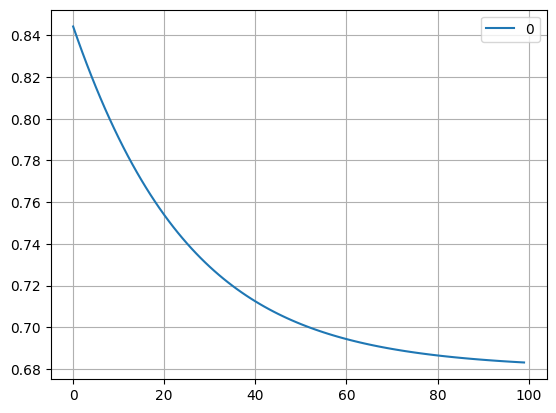

In [ ]:
df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind = "line", grid = True).get_figure()
df_plot.savefig("loss.png")